### IMPORTANDO LIBERIAS Y DATASET

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [118]:
ds = pd.read_csv("default_dataset.csv", delimiter=",")


### EXPLORACION DE DATASET

In [119]:
ds.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,8920,50000,1,1,2,23,2,3,2,0,...,8687,9048,9306,0,1000,810,500,408,500,1
1,8926,20000,1,3,1,51,0,0,0,0,...,18905,19462,18967,1266,1270,2800,1000,0,512,1
2,8930,10000,1,2,2,29,2,2,2,2,...,9089,8658,8372,2600,600,895,0,0,764,1
3,8933,240000,2,2,2,42,1,2,2,0,...,166813,170739,174532,6700,0,6900,6000,6000,6000,1
4,8938,170000,2,1,2,30,2,0,0,0,...,30183,31041,31871,2000,2000,1233,1500,1500,2000,1


In [120]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         27999 non-null  int64
 1   LIMIT_BAL  27999 non-null  int64
 2   SEX        27999 non-null  int64
 3   EDUCATION  27999 non-null  int64
 4   MARRIAGE   27999 non-null  int64
 5   AGE        27999 non-null  int64
 6   PAY_0      27999 non-null  int64
 7   PAY_2      27999 non-null  int64
 8   PAY_3      27999 non-null  int64
 9   PAY_4      27999 non-null  int64
 10  PAY_5      27999 non-null  int64
 11  PAY_6      27999 non-null  int64
 12  BILL_AMT1  27999 non-null  int64
 13  BILL_AMT2  27999 non-null  int64
 14  BILL_AMT3  27999 non-null  int64
 15  BILL_AMT4  27999 non-null  int64
 16  BILL_AMT5  27999 non-null  int64
 17  BILL_AMT6  27999 non-null  int64
 18  PAY_AMT1   27999 non-null  int64
 19  PAY_AMT2   27999 non-null  int64
 20  PAY_AMT3   27999 non-null  int64
 21  PAY_AMT4   2

In [121]:
ds.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,15749.304368,169647.833137,1.607522,1.853888,1.552484,35.484696,-0.063324,-0.169327,-0.201900,-0.248009,...,43501.129397,40427.848780,38988.426658,5823.589878,6.107637e+03,5383.826137,4951.663381,4878.592700,5342.790350,0.165613
std,8452.091410,130240.416104,0.488311,0.795310,0.521850,9.168462,1.088628,1.162094,1.158822,1.139461,...,64547.035637,60932.675754,59691.059489,16926.065931,2.362333e+04,17997.627313,16023.404493,15329.242967,17990.023991,0.371740
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8999.500000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2373.000000,1809.000000,1278.000000,1000.000000,1.000000e+03,457.000000,316.000000,298.500000,188.000000,0.000000
50%,15999.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19097.000000,18106.000000,17021.000000,2184.000000,2.078000e+03,1917.000000,1520.000000,1548.000000,1500.000000,0.000000
75%,22998.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55154.500000,50437.500000,49380.000000,5100.000000,5.000000e+03,4730.000000,4162.000000,4181.500000,4133.500000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [122]:
total = ds.isnull().sum().sort_values(ascending = False)
percent = (ds.isnull().sum()/ds.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No existen campos nulos

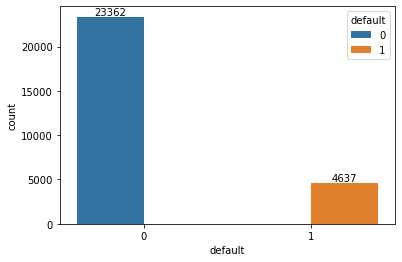

In [123]:
ax = sns.countplot(x='default', hue='default', data=ds)
for container in ax.containers:
    ax.bar_label(container)


En la data solamente 4637 (16%) creditos de 27999 caen en default. 

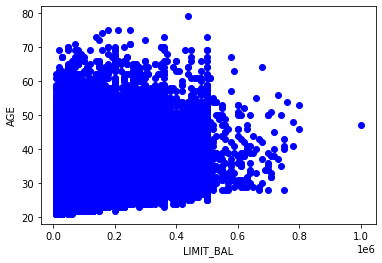

In [124]:
plt.scatter(ds['LIMIT_BAL'], ds['AGE'],c='blue', alpha=1)
plt.xlabel('LIMIT_BAL')
plt.ylabel('AGE')
plt.show()

<AxesSubplot:>

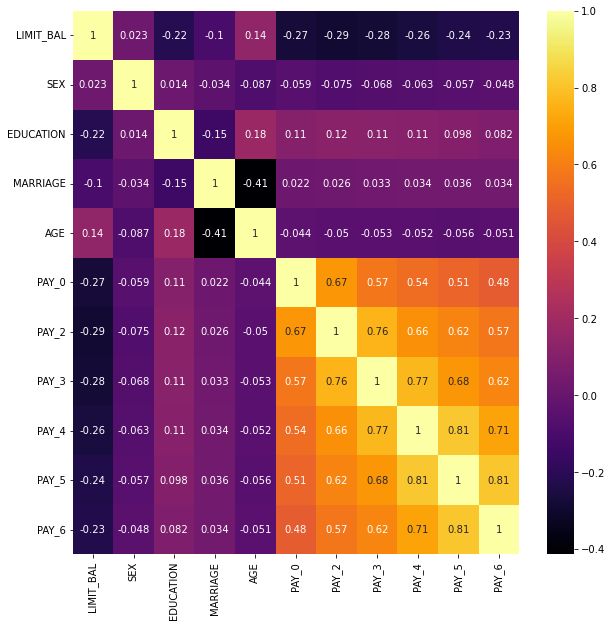

In [125]:
plt.figure(figsize=(10,10))
var = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'      ]
sns.heatmap(ds[var].corr(),annot=True,cmap='inferno')

<AxesSubplot:>

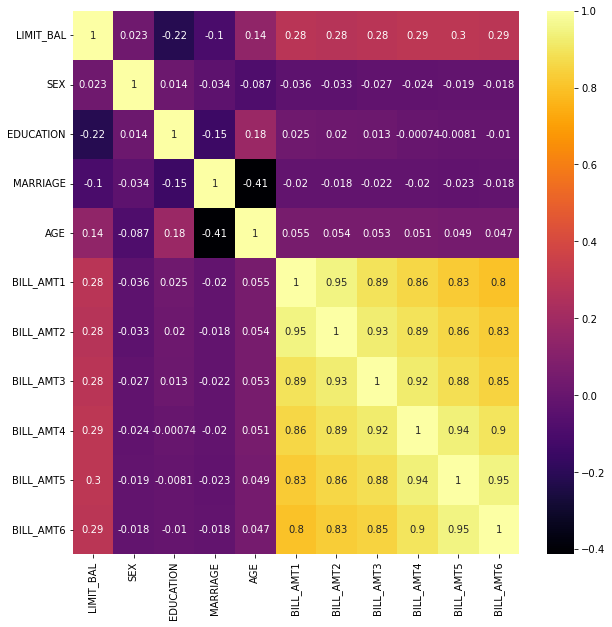

In [126]:
plt.figure(figsize=(10,10))
var = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'      ]
sns.heatmap(ds[var].corr(),annot=True,cmap='inferno')

Existe correlacion, va disminuyendo segun pasa el tiempo

<AxesSubplot:>

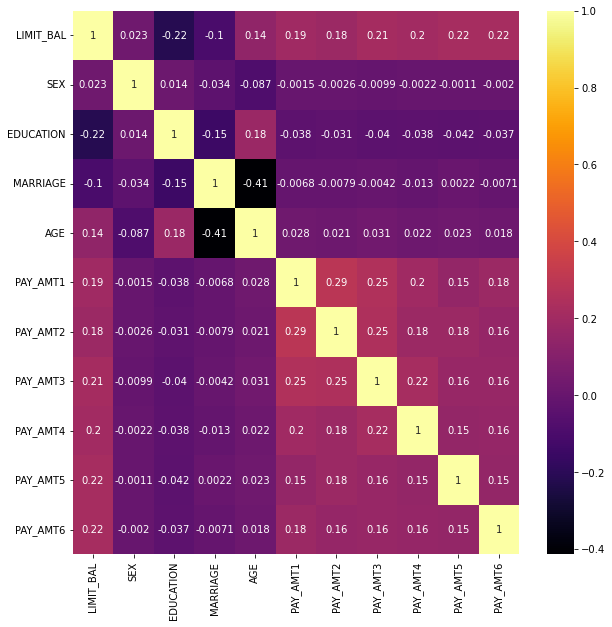

In [127]:
plt.figure(figsize=(10,10))
var = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'      ]
sns.heatmap(ds[var].corr(),annot=True,cmap='inferno')

Baja correlacion de variables PAY_AMT

### PREDICCION

In [128]:
x = ds[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
       'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values
y = ds['default'].values

In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Regresion Logistica

In [141]:
prediction = dict()
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [142]:
prediction['Logistic'] = logreg.predict(X_test)

In [143]:
print('Precisión del modelo')
a= accuracy_score(y_test, prediction['Logistic'])
a=a*100
print(a)

Precisión del modelo
85.10714285714286


### Random Forest

In [144]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4714
           1       0.63      0.32      0.43       886

    accuracy                           0.86      5600
   macro avg       0.76      0.64      0.67      5600
weighted avg       0.84      0.86      0.84      5600



### CONCLUSION

Con el modelo de Random Forest la precicion del modelo mejora, si bien se predice que el 96% de los clientes no caen en default, para los que caen en default solamente se predice el 33%. Precision del 86%.
Al modelo actual se le hace mas facil predecir cuando un cliente no cae en default, este comportamiento es debido a que los datos estan desproporcionados, ya que mantengo mas clientes categorizados como no default que el resto. En resumen el dataset no se encuentra balanceado por la distribucion que tiene la variable default.